In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully.")

✅ All libraries imported successfully.


In [3]:
# Define file paths
raw_data_path = "../01_raw_data/hotel_bookings.csv"

# Load the dataset into a Pandas DataFrame
try:
    df = pd.read_csv(raw_data_path)
    print(f"✅ Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("❌ Error: File not found. Please check the file path.")
    
# Display initial overview
print("\n📋 Dataset Info:")
print("-" * 50)
df.info()

✅ Data loaded successfully. Shape: (119390, 32)

📋 Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                

In [4]:
# Display basic statistics for numerical columns
print("📊 Descriptive Statistics for Numerical Features:")
print("-" * 60)
print(df.describe())

# Display basic statistics for categorical columns
print("\n📊 Descriptive Statistics for Categorical Features:")
print("-" * 60)
print(df.describe(include=['O']))

📊 Descriptive Statistics for Numerical Features:
------------------------------------------------------------
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.00000

In [5]:
print("🔍 Data Quality Assessment:")
print("=" * 55)

# Check for missing values
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage.round(2)
})

print("\nMissing Value Analysis:")
print("-" * 30)
print(missing_info[missing_info['Missing Values'] > 0])

# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"\n🔎 Duplicate Rows: {duplicate_rows}")

🔍 Data Quality Assessment:

Missing Value Analysis:
------------------------------
          Missing Values  Percentage (%)
children               4            0.00
country              488            0.41
agent              16340           13.69
company           112593           94.31

🔎 Duplicate Rows: 31994


In [6]:
# Create a copy of the DataFrame for cleaning
df_clean = df.copy()

print("🧹 Beginning Data Cleaning Process...")
print("-" * 40)

# 1. Handle Missing Values
print("1. Imputing missing values...")

# For numerical columns, fill with 0
numerical_cols = ['children', 'agent', 'company']
df_clean[numerical_cols] = df_clean[numerical_cols].fillna(0)

# For categorical columns, fill with 'Unknown'
categorical_cols = ['country', 'meal']
df_clean[categorical_cols] = df_clean[categorical_cols].fillna('Unknown')

# 2. Convert Data Types
print("2. Converting data types...")
df_clean['children'] = df_clean['children'].astype('int64')
df_clean['agent'] = df_clean['agent'].astype('int64')
df_clean['company'] = df_clean['company'].astype('int64')

# 3. Remove Duplicates
print("3. Removing duplicates...")
initial_count = len(df_clean)
df_clean = df_clean.drop_duplicates()
final_count = len(df_clean)
duplicates_removed = initial_count - final_count

print(f"   Removed {duplicates_removed} duplicate rows.")

print("✅ Data cleaning completed successfully.")

🧹 Beginning Data Cleaning Process...
----------------------------------------
1. Imputing missing values...
2. Converting data types...
3. Removing duplicates...
   Removed 31994 duplicate rows.
✅ Data cleaning completed successfully.


In [7]:
print("🔎 Post-Cleaning Validation:")
print("=" * 40)

# Check if missing values remain
remaining_missing = df_clean.isnull().sum().sum()
print(f"Remaining missing values: {remaining_missing}")

# Verify data types
print("\n📋 Cleaned Dataset Info:")
print("-" * 30)
df_clean.info()

# Display sample of cleaned data
print("\n👀 Sample of Cleaned Data (5 rows):")
print("-" * 40)
df_clean.head()

🔎 Post-Cleaning Validation:
Remaining missing values: 0

📋 Cleaned Dataset Info:
------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
# Define output path
output_path = "../03_cleaned_data/hotel_bookings_cleaned.csv"

# Export to CSV
df_clean.to_csv(output_path, index=False)

print(f"💾 Cleaned dataset successfully exported to:")
print(f"   {output_path}")
print(f"   Final Shape: {df_clean.shape}")

💾 Cleaned dataset successfully exported to:
   ../03_cleaned_data/hotel_bookings_cleaned.csv
   Final Shape: (87396, 32)


In [9]:
print("📈 Generating Preliminary Insights...")
print("=" * 45)

# 1. Booking Distribution by Hotel Type
hotel_distribution = df_clean['hotel'].value_counts()
print("\n1. Booking Distribution by Hotel Type:")
print("-" * 35)
print(hotel_distribution)

# 2. Cancellation Rate Analysis
cancellation_rate = (df_clean['is_canceled'].mean() * 100).round(2)
print(f"\n2. Overall Cancellation Rate: {cancellation_rate}%")

# 3. Top 5 Countries by Guest Origin
top_countries = df_clean['country'].value_counts().head(5)
print("\n3. Top 5 Countries by Number of Guests:")
print("-" * 35)
print(top_countries)

📈 Generating Preliminary Insights...

1. Booking Distribution by Hotel Type:
-----------------------------------
City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

2. Overall Cancellation Rate: 27.49%

3. Top 5 Countries by Number of Guests:
-----------------------------------
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
Name: country, dtype: int64


In [10]:
# Load the cleaned data we just created
analysis_df = pd.read_csv('../03_cleaned_data/hotel_bookings_cleaned.csv')
print(f"Data loaded for analysis. Shape: {analysis_df.shape}")
analysis_df.head(2)

Data loaded for analysis. Shape: (87396, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [11]:
print("🏨 HOTEL PERFORMANCE ANALYSIS")
print("="*50)

# 1. Cancellation Rate by Hotel Type
cancel_by_hotel = analysis_df.groupby('hotel')['is_canceled'].mean() * 100
print("\n1. Cancellation Rate by Hotel Type:")
print(cancel_by_hotel.round(2))

# 2. Average Lead Time (How far in advance are people booking?)
lead_time = analysis_df.groupby('hotel')['lead_time'].mean()
print("\n2. Average Lead Time (Days):")
print(lead_time.round(2))

# 3. Revenue Potential (Assuming a standard room rate - ADR is Average Daily Rate)
avg_daily_rate = analysis_df.groupby('hotel')['adr'].mean()
print("\n3. Average Daily Rate (€):")
print(avg_daily_rate.round(2))

# 4. Busiest Months (Group by arrival month)
busiest_months = analysis_df['arrival_date_month'].value_counts()
print("\n4. Top 5 Busiest Months:")
print(busiest_months.head())

🏨 HOTEL PERFORMANCE ANALYSIS

1. Cancellation Rate by Hotel Type:
hotel
City Hotel      30.04
Resort Hotel    23.48
Name: is_canceled, dtype: float64

2. Average Lead Time (Days):
hotel
City Hotel      77.68
Resort Hotel    83.37
Name: lead_time, dtype: float64

3. Average Daily Rate (€):
hotel
City Hotel      110.99
Resort Hotel     99.03
Name: adr, dtype: float64

4. Top 5 Busiest Months:
August    11257
July      10057
May        8355
April      7908
June       7765
Name: arrival_date_month, dtype: int64


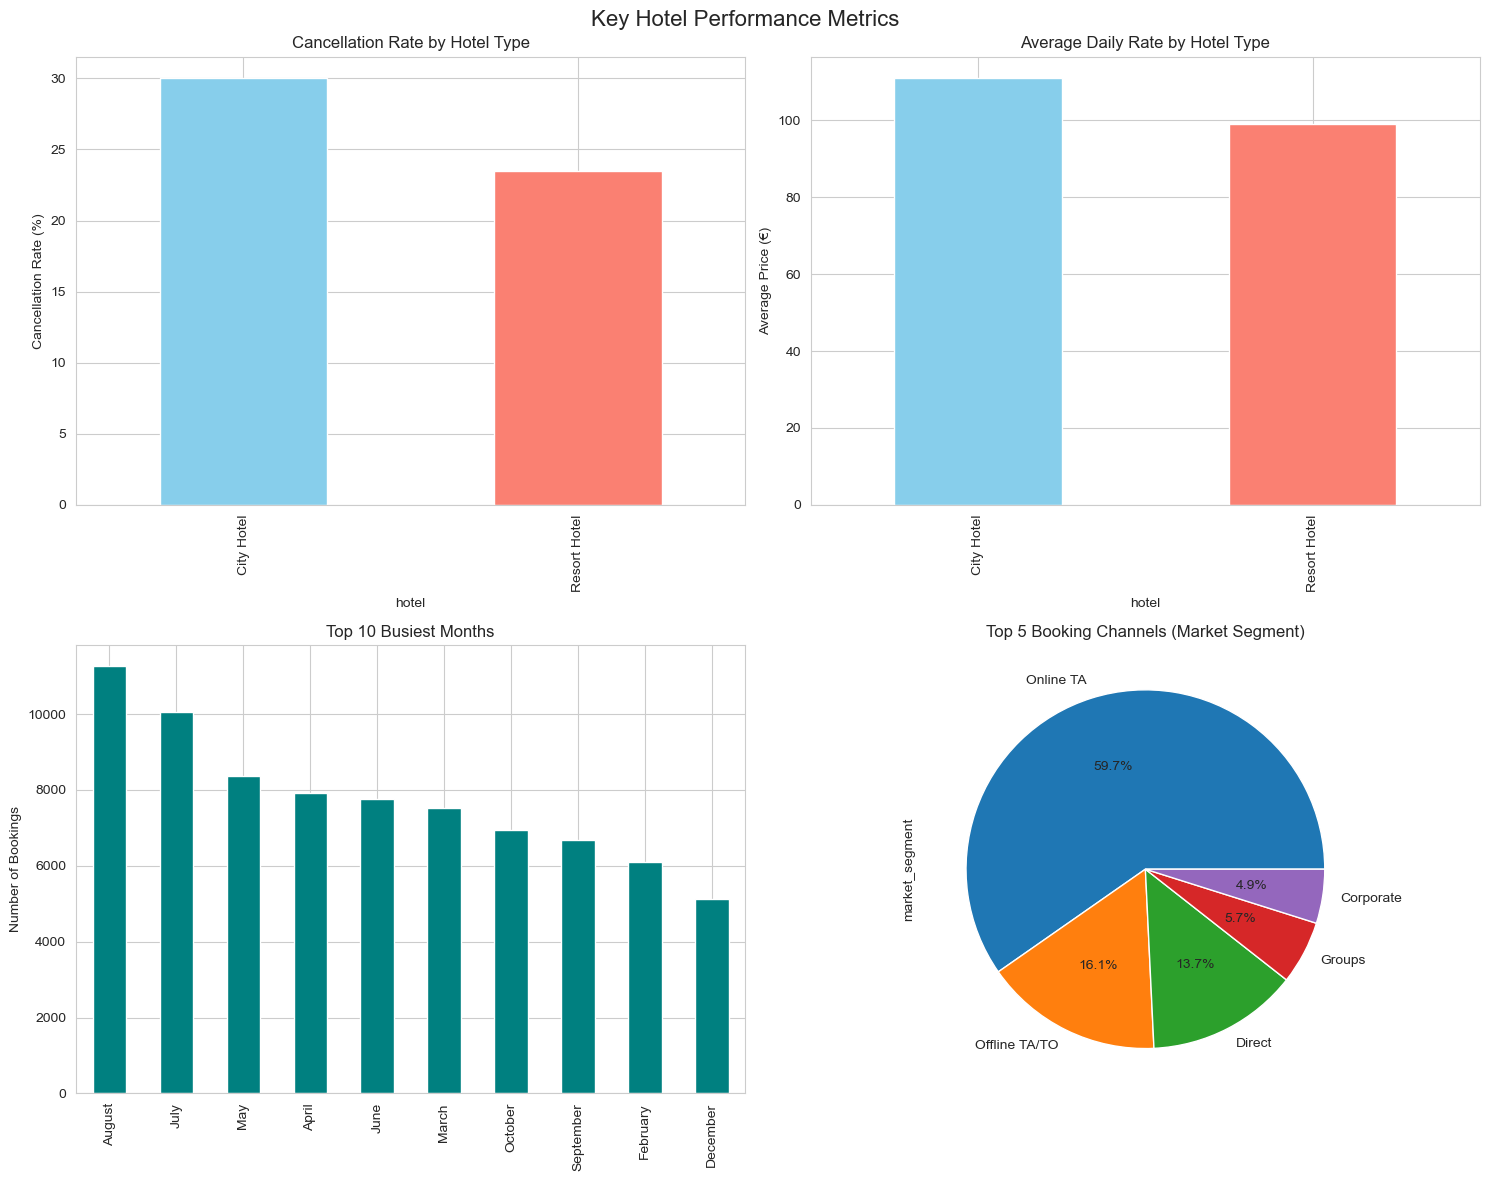

In [12]:
# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
plt.suptitle('Key Hotel Performance Metrics', fontsize=16)

# Graph 1: Cancellation Rate by Hotel Type
cancel_by_hotel.plot(kind='bar', ax=axes[0,0], color=['skyblue', 'salmon'])
axes[0,0].set_title('Cancellation Rate by Hotel Type')
axes[0,0].set_ylabel('Cancellation Rate (%)')

# Graph 2: Average Daily Rate by Hotel Type
avg_daily_rate.plot(kind='bar', ax=axes[0,1], color=['skyblue', 'salmon'])
axes[0,1].set_title('Average Daily Rate by Hotel Type')
axes[0,1].set_ylabel('Average Price (€)')

# Graph 3: Booking Volume by Month
busiest_months.head(10).plot(kind='bar', ax=axes[1,0], color='teal')
axes[1,0].set_title('Top 10 Busiest Months')
axes[1,0].set_ylabel('Number of Bookings')
plt.xticks(rotation=45)

# Graph 4: Market Segment Distribution
market_segment = analysis_df['market_segment'].value_counts().head(5)
market_segment.plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Top 5 Booking Channels (Market Segment)')

plt.tight_layout()
plt.savefig('../05_PowerBI_Dashboard/hotel_insights.png')  # Saves the image for your report
plt.show()